In [1]:
import numpy as np, pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Scenario
We are the lead data analists at Ubank. The bank consists of 5000 customers and we were tasked with segmenting them into 3
homogeneous groups, then define these groups.

Since we know how exactly how many groups we want, we'll apply the KMeans unsupervised machine learning technique.Also, it will
prove usful because it will allow us to cross examine the groups features with the bank related activity in order to potentialy
predict new customers behavior while. Let's get to it!

<img src="files/Kmeans_Features.png">

First we'll load and take a look at our initial data.

In [2]:
ubank = pd.read_csv('ubank.csv')
ubank.head()

,ID,Age,Experience,Income,Family,CCAvg,Mortgage,Education,SecuritiesAccount,CDAccount,Online,CreditCard,PersonalLoan
0,1,25,1,49,4,1.6,0,1,1,0,0,0,0
1,2,45,19,34,3,1.5,0,1,1,0,0,0,0
2,3,39,15,11,1,1.0,0,1,0,0,0,0,0
3,4,35,9,100,1,2.7,0,2,0,0,0,0,0
4,5,35,8,45,4,1.0,0,2,0,0,0,1,0


We have been instructed to differentiate the groups based on the features "Age"-"Mortgage". So we'll define a new DataFrame
to work with.

In [3]:
df = ubank.iloc[:,1:7]
df.head()

,Age,Experience,Income,Family,CCAvg,Mortgage
0,25,1,49,4,1.6,0
1,45,19,34,3,1.5,0
2,39,15,11,1,1.0,0
3,35,9,100,1,2.7,0
4,35,8,45,4,1.0,0


Before we get started, we should check for any missing data in order to avoide future errors. Data seems to be fine.

In [4]:
df.isnull().values.any()

False

Alright, everything is set and we're good to go!
We'll scale our data first in order to properly analyze it. The scale function will return a normalized matrix. so we need to
convert it back to a Dataframe.

In [5]:
scaled_df = pd.DataFrame(scale(df), columns=df.columns)
scaled_df.head()

,Age,Experience,Income,Family,CCAvg,Mortgage
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193371,-0.555524
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250595,-0.555524
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536720,-0.555524
3,-0.901970,-0.968413,0.569765,-1.216855,0.436103,-0.555524
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536720,-0.555524


Now we'll applly the KMeans algorithm on our data. Remember, our k=3 because that's the number of groups we want. We'll also
set a seed value so results stay consistant. Note: random_state is set to 1234 in order to get consistant results.


In [6]:
clf = KMeans(n_clusters=3, random_state=1234)
clf.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1234, tol=0.0001, verbose=0)

We now have our clusters and centroids, let's take a look at them.

In [7]:
centroids = clf.cluster_centers_
centroids

array([[ 0.88450844,  0.87884575, -0.33604117, -0.00782113, -0.33383563,
        -0.11758488],
       [-0.89686385, -0.89808758, -0.29827152,  0.18770967, -0.32362705,
        -0.10490171],
       [-0.14362878, -0.12609341,  1.57888046, -0.42758295,  1.63367176,
         0.5537406 ]])

Note that each point(customer) has been labeld/assigned to a cluster.

In [8]:
labels = clf.labels_
labels

array([1, 1, 1, ..., 0, 0, 1])

We have clusters 0-2 (three clusters) to which each customer is assigned, just like we wanted. Let's create a new column
in our original DataFrame(ubank) in order to better associate each customer to their assigned cluster.
We'll also add the cluster column to the working DataFrame for additional analysis.

In [9]:
df['cluster'] = labels
ubank['cluster'] = labels
ubank.tail()

,ID,Age,Experience,Income,Family,CCAvg,Mortgage,Education,SecuritiesAccount,CDAccount,Online,CreditCard,PersonalLoan,cluster
4995,4996,29,3,40,1,1.9,0,3,0,0,1,0,0,1
4996,4997,30,4,15,4,0.4,85,1,0,0,1,0,0,1
4997,4998,63,39,24,2,0.3,0,3,0,0,0,0,0,0
4998,4999,65,40,49,3,0.5,0,2,0,0,1,0,0,0
4999,5000,28,4,83,3,0.8,0,1,0,0,1,1,0,1


Great, now let's start working and analyze our results. I.E, this is where the fun begins!
We should first take a look at the size of our clusters.

In [10]:
ubank['cluster'].value_counts()

0    2163
1    1999
2     838
Name: cluster, dtype: int64

We can see that we have two groups of similar sizes and one small group. We'll take a look at the euclidian distance between
the largest group and the smallest group centroids.

In [11]:
centroids_distance = np.linalg.norm(centroids[0]-centroids[2])
centroids_distance

3.1987273918933057

OK, it's time to find out what characterizes each cluster/group.
But before that we'll drop the ID column due to it's lack of significance.

In [12]:
ubank.drop('ID', 1, inplace=True)

Education is an important value we wan't to look at, but we need to better classify the Education column 
in order to get a clearer look at our results seeing that it's an ordinal feature. We'll make a frequency tbale.

Education,1,2,3,All
cluster,,,,
0,16.40,12.82,14.04,43.26
1,15.10,12.52,12.36,39.98
2,10.42,2.72,3.62,16.76
All,41.92,28.06,30.02,100.00


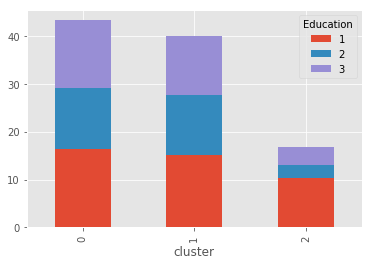

In [13]:
edu = pd.crosstab(index=ubank["cluster"], columns=ubank["Education"], margins=True)
edu = (edu/edu.ix[-1,-1])*100
edu.iloc[:-1, :-1].plot(kind='bar', stacked=True)
edu

We will also examine the other features of our dataset that are nominal variables via frequency tables.
features "SecuritiesAccount" - "PersonalLoan".

Online,0,1,All
cluster,,,
0,17.02,26.24,43.26
1,16.78,23.20,39.98
2,6.52,10.24,16.76
All,40.32,59.68,100.00


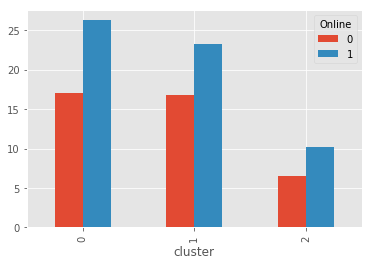

In [14]:
online = pd.crosstab(index=ubank['cluster'], columns=ubank['Online'], margins=True)
online = (online/online.ix[-1,-1])*100
online.iloc[:-1, :-1].plot(kind='bar')
online

CDAccount,0,1,All
cluster,,,
0,41.36,1.90,43.26
1,38.42,1.56,39.98
2,14.18,2.58,16.76
All,93.96,6.04,100.00


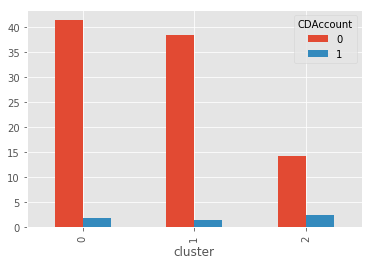

In [15]:
CDAccount = pd.crosstab(index=ubank['cluster'], columns=ubank['CDAccount'], margins=True)
CDAccount = (CDAccount/CDAccount.ix[-1,-1])*100
CDAccount.iloc[:-1, :-1].plot(kind='bar')
CDAccount

PersonalLoan,0,1,All
cluster,,,
0,41.64,1.62,43.26
1,38.48,1.50,39.98
2,10.28,6.48,16.76
All,90.40,9.60,100.00


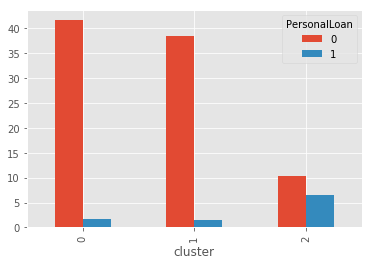

In [16]:
PersonalLoan = pd.crosstab(index=ubank['cluster'], columns=ubank['PersonalLoan'], margins=True)
PersonalLoan = (PersonalLoan/PersonalLoan.ix[-1,-1])*100
PersonalLoan.iloc[:-1, :-1].plot(kind='bar')
PersonalLoan

CreditCard,0,1,All
cluster,,,
0,30.32,12.94,43.26
1,28.56,11.42,39.98
2,11.72,5.04,16.76
All,70.60,29.40,100.00


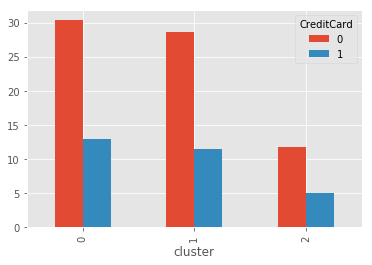

In [17]:
CreditCard = pd.crosstab(index=ubank['cluster'], columns=ubank['CreditCard'], margins=True)
CreditCard = (CreditCard/CreditCard.ix[-1,-1])*100
CreditCard.iloc[:-1, :-1].plot(kind='bar')
CreditCard

SecuritiesAccount,0,1,All
cluster,,,
0,38.82,4.44,43.26
1,35.76,4.22,39.98
2,14.98,1.78,16.76
All,89.56,10.44,100.00


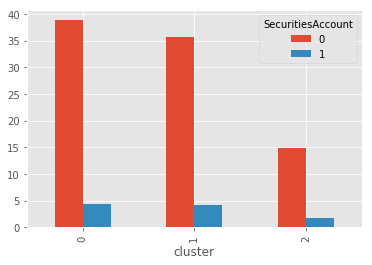

In [18]:
SecuritiesAccount = pd.crosstab(index=ubank['cluster'], columns=ubank['SecuritiesAccount'], margins=True)
SecuritiesAccount = (SecuritiesAccount/SecuritiesAccount.ix[-1,-1])*100
SecuritiesAccount.iloc[:-1, :-1].plot(kind='bar')
SecuritiesAccount

Let's look at the mean value of each numerical feature in our dataset.

In [19]:
mean_df = df.groupby('cluster').mean()
mean_df

,Age,Experience,Income,Family,CCAvg,Mortgage
cluster,,,,,,
0,55.476653,30.182154,58.306519,2.387425,1.354538,44.539991
1,35.058529,9.806403,60.045023,2.611806,1.372378,45.829915
2,43.692124,18.658711,146.448687,1.905728,4.792741,112.816229


Looking at our table we can see some major differences between the groups.
Age, Experience, Income, Education, CDAccount etc.
It would be a good idea (and fun) to visualize this for upper managment.

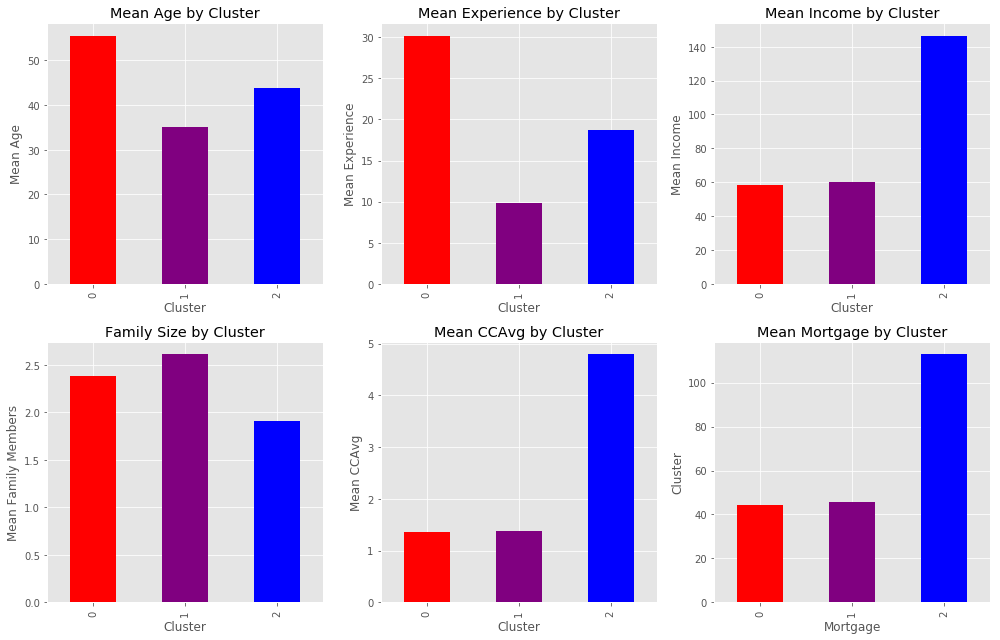

In [20]:
fig, ax1, ax2, ax3, ax4, ax5, ax6 = plt.figure(figsize=(14,9)), plt.subplot2grid((2,3), (0,0)), \
                                    plt.subplot2grid((2,3), (0,1)), plt.subplot2grid((2,3), (0,2)),\
                                    plt.subplot2grid((2,3), (1,0)), plt.subplot2grid((2,3), (1,1)), plt.subplot2grid((2,3), (1,2))

colors =['r', 'purple', 'b']        

mean_df['Age'].plot(kind='bar', ax=ax1, title='Mean Age by Cluster', color=colors)
ax1.set_xlabel('Cluster')
ax1.set_ylabel('Mean Age')

mean_df['Experience'].plot(kind='bar', ax=ax2, title='Mean Experience by Cluster', color=colors)
ax2.set_xlabel('Cluster')
ax2.set_ylabel('Mean Experience')

mean_df['Income'].plot(kind='bar', ax=ax3, title='Mean Income by Cluster', color=colors)
ax3.set_xlabel('Cluster')
ax3.set_ylabel('Mean Income')

mean_df['Family'].plot(kind='bar', stacked=True, ax=ax4, title='Family Size by Cluster', color=colors)
ax4.set_xlabel('Cluster')
ax4.set_ylabel('Mean Family Members')

mean_df['CCAvg'].plot(kind='bar', ax=ax5, title='Mean CCAvg by Cluster', color=colors)
ax5.set_xlabel('Cluster')
ax5.set_ylabel('Mean CCAvg')

mean_df['Mortgage'].plot(kind='bar', ax=ax6, title='Mean Mortgage by Cluster', color=colors)
ax6.set_xlabel('Mortgage')
ax6.set_ylabel('Cluster')

plt.tight_layout()

As we can see, there are three types of groups with different characteristics.

Group I (cluster 0): Older with more experience and education, yet have lower income. Pensioners.
Group II (cluster 1): Younger with bigger family size and lower income yet seem to be rather educated but less experienced. Young Couples.
Group III(cluster 2): Average age, high income, small family sizes, High use of bank services, fair amount of experience yet less educated. Heavy spenders, buisness men.

Seems we have our groups and we know which one of them is the most profitable. Let's take this to upper management! 